# TensorFlow - Basic MLP

### Importing TensorFlow and checking the version

In [1]:
import tensorflow as tf
tf.__version__

'1.1.0'

### Setting up the Graph

In [2]:
# The graph
tf.reset_default_graph()
graph = tf.get_default_graph()

In [3]:
# Reseting Tensorboard
sess = tf.Session()
#!rm -rf log_simple_graph
#!rm -rf matrix_graph
#!rm -rf log_simple_stat

### Creating some example operations

Simple Neuron

In [4]:
# sample input to make graph above
input_a = tf.constant(4., dtype =tf.float32 ,name='a')
input_b = tf.constant(3., dtype =tf.float32, name='b')

#simple_addition operator
c = tf.add(input_a,input_b,name='a_plus_b')

#simple_mulitplication
d = tf.multiply(input_a,input_b,name='a_mul_b')

#
e = tf.multiply(c,d,name='c_mul_d')

In [5]:
# without a running a session we don't get any values
print(c)

Tensor("a_plus_b:0", shape=(), dtype=float32)


Lets look inside these operation objects

In [6]:
#Examining our operations
operations = graph.get_operations()
for operation in operations:
    print(operation.name," ", operation.type)

a   Const
b   Const
a_plus_b   Add
a_mul_b   Mul
c_mul_d   Mul


In [7]:
operations[-2].node_def

name: "a_mul_b"
op: "Mul"
input: "a"
input: "b"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}

In [8]:
### Runnning the Graph in a session
print(sess.run(c))

7.0


In [9]:
### Runnning the Graph in a session
summary_writer = tf.summary.FileWriter('log_simple', sess.graph)
sess.run(e)

84.0

In [10]:
!tensorboard --logdir=log_simple

Starting TensorBoard b'41' on port 6006
^C
Traceback (most recent call last):
  File "/Users/samwitteveen/anaconda/envs/tf01/bin/tensorboard", line 11, in <module>
    sys.exit(main())
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/site-packages/tensorflow/tensorboard/tensorboard.py", line 151, in main
    tb_server.serve_forever()
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/socketserver.py", line 232, in serve_forever
    ready = selector.select(poll_interval)
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/selectors.py", line 376, in select
    fd_event_list = self._poll.poll(timeout)
KeyboardInterrupt


In [12]:
# The graph
tf.reset_default_graph()
graph = tf.get_default_graph()
sess = tf.Session()

!rm -rf matrix_graph
!rm -rf log_simple


#tensor_a = tf.random_normal(shape=[3,3], mean=0.0,stddev=1.0, dtype=tf.float32,name='tensor_a')
tensor_a = tf.constant([[4,5,6],[1,3,5],[3,1,3]],shape=[3,3], dtype =tf.float32 ,name='tensor_b')
tensor_b = tf.constant([[4.,3,5],[12,3,45],[63,41,3]],shape=[3,3], dtype =tf.float32 ,name='tensor_b')

tensor_matrix_mul = tf.matmul(tensor_a,tensor_b)

In [13]:
# getting tensor shape  
tensor_a.get_shape()

TensorShape([Dimension(3), Dimension(3)])

In [14]:
### Runnning the Graph in a session
print(sess.run(tensor_a))

[[ 4.  5.  6.]
 [ 1.  3.  5.]
 [ 3.  1.  3.]]


In [15]:
#sess = tf.Session()
print(sess.run(tensor_b))

[[  4.   3.   5.]
 [ 12.   3.  45.]
 [ 63.  41.   3.]]


$$ 
\begin{bmatrix}
    4 &  5 &  6 \\
    1  & 3 &  5 \\
    3  & 1 &  3 \\
\end{bmatrix}
•
\begin{bmatrix}
    4 &  3 &  5 \\
    12 &  3 &  45 \\
    63 &  41 &  3 \\
\end{bmatrix}
=
\begin{bmatrix}
    454 &  273 &  263 \\
    355 &  217 &  155 \\
    213 & 135 &  69 \\
\end{bmatrix}
$$

In [16]:
print(sess.run(tensor_matrix_mul))

[[ 454.  273.  263.]
 [ 355.  217.  155.]
 [ 213.  135.   69.]]


In [17]:
### Runnning the Graph on tensor board
summary_writer = tf.summary.FileWriter('matrix_graph', sess.graph)
!tensorboard --logdir=matrix_graph

Starting TensorBoard b'41' on port 6006
^C
Traceback (most recent call last):
  File "/Users/samwitteveen/anaconda/envs/tf01/bin/tensorboard", line 11, in <module>
    sys.exit(main())
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/site-packages/tensorflow/tensorboard/tensorboard.py", line 151, in main
    tb_server.serve_forever()
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/socketserver.py", line 232, in serve_forever
    ready = selector.select(poll_interval)
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/selectors.py", line 376, in select
    fd_event_list = self._poll.poll(timeout)
KeyboardInterrupt


## Building your first network

In [2]:
import tensorflow as tf
tf.__version__

'1.1.0'

## MNIST Model with Pure TensorFlow

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [20]:
# Import MNIST from TF Examples
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Load data
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [21]:
X_train = X_train[:50000]
Y_train = Y_train[:50000]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 784)
(50000, 10)
(10000, 784)
(10000, 10)


### MNIST Image Tensor X_train

<img src="./diagram4f.png" style="width:550px;">
<img src="./diagram6d.png" style="width:550px;">

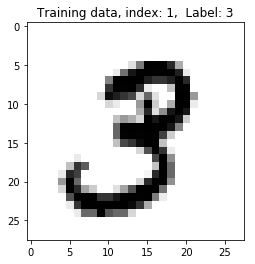

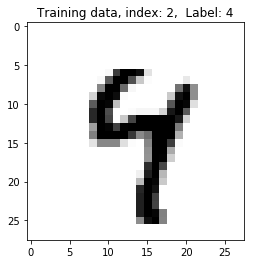

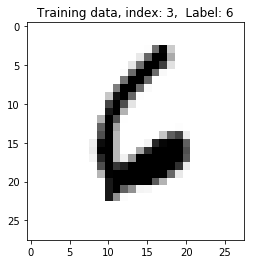

In [23]:
# Method for displaying the number as a picture

def show_digit(index):
    label = Y_train[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = X_train[index].reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
def show_predicted_digit(image, pred, label):
    # Reshape 784 array into 28x28 image
    image = image.reshape([28,28])
    plt.title('Original Image, Pred: %d,  True Label: %d' %(pred, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
show_digit(1)
show_digit(2)
show_digit(3)

#### Batching allows TF to streamline a cimputation for the processors eg. GPU

In [24]:
# Create a batch of 64 images and their labels
batch_X, batch_Y = mnist.train.next_batch(64)

In [25]:
batch_X.shape

(64, 784)

<img src="./diagram3c.gif" style="width:750px;">

### Setting up our Network Hyper Parameters

In [49]:
# Training Parameters for basic MNIST
learning_rate = 0.1 
training_epochs = 2
batch_size = 100
display_step = 1  # for how often to print out our results
model_path = "./talk_save/model1.ckpt" #"./talk_save/model.ckpt"
alt_model_path = "./talk_save/model.ckpt" #"./talk_save/model.ckpt"


# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 384 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_classes = 10 # MNIST classes for prediction(digits 0-9 )

In [50]:
# The graph
tf.reset_default_graph()
#!rm -rf log_simple_graph
!rm -rf matrix_graph
#!rm -rf log_simple_graph/3


# tf Graph input
with tf.name_scope('Inputs') as scope:
    x = tf.placeholder("float", [None, n_input],name='x_input')
    y = tf.placeholder("float", [None, n_classes],name='labels')

In [51]:
# Create model
def multilayer_perceptron(x):
    
    with tf.name_scope('hidden_01') as scope:
        # Hidden layer 01 with RELU activation
        
        #weights and bias tensor
        h1weight = tf.Variable(tf.truncated_normal([n_input, n_hidden_1],stddev=0.1),name='h1_weights')
        h1bias = tf.Variable(tf.truncated_normal([n_hidden_1],stddev=0.1),name='b1_bias')
        
        #hidden layer 01 Ops
        layer_1 = tf.add(tf.matmul(x, h1weight), h1bias,name='Layer1_matmul')  # adding (x•w1) + bias1)
        layer_1 = tf.nn.relu(layer_1, name='Layer1_Relu') #activation Relu passes anything above 0 and blocks negative
        
        #tensorboard histograms for layer 01
        tf.summary.histogram('weights_h1',h1weight)
        tf.summary.histogram('bias_h1',h1bias)
        
    with tf.name_scope('hidden_02') as scope:
        # Hidden layer 02 with RELU activation
        h2weights = tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2],stddev=0.1),name='h2_weights')
        h2bias = tf.Variable(tf.truncated_normal([n_hidden_2],stddev=0.1),name='b2_bias')
        
        layer_2 = tf.add(tf.matmul(layer_1, h2weights), h2bias,name='Layer2_add')
        layer_2 = tf.nn.relu(layer_2, name='Layer2_Relu')
        #tensorboard histograms
        tf.summary.histogram('weights_h2',h2weights)
        tf.summary.histogram('bias_h2',h2bias)
        
    with tf.name_scope('output_layer') as scope:
        # Logits layer with linear activation
        output_weights = tf.Variable(tf.truncated_normal([n_hidden_2, n_classes],stddev=0.1),name='output_weights')
        output_bias = tf.Variable(tf.truncated_normal([n_classes],stddev=0.1),name='out_bias')
        
        logits_layer = tf.add(tf.matmul(layer_2, output_weights), output_bias,name='logits')

    return logits_layer

In [52]:
pred = multilayer_perceptron(x)

In [53]:
# Define loss and optimizer
with tf.name_scope('cross_entropy'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels= y, logits=pred ))   #compute the error against the correct results

with tf.name_scope('train'):    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss) # optimizer makes changes to the weights and bias to reduce loss
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

In [54]:
# 'Saver' op to save and restore all the variables
saver = tf.train.Saver()

In [55]:
### Runnning the Graph on tensor board
file_writer = tf.summary.FileWriter('log_simple_graph/9', sess.graph)

tf.summary.scalar("accuracy", accuracy)
tf.summary.scalar("loss", loss)

summary_op = tf.summary.merge_all()

### Train the Network by running the Session


In [56]:
%%time

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c,summary = sess.run([optimizer, loss,summary_op], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
            #write to file TensorBoard variables
            file_writer.add_summary(summary, epoch  + i)
        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "Loss =", \
                "{:.9f}".format(avg_cost))
    print ("Optimization Finished!")
    

    # Save model weights to disk
    save_path = saver.save(sess, model_path)
    print ("Model saved to: %s" % save_path)
 

Epoch: 0001 Loss = 1.477629425
Epoch: 0002 Loss = 0.731560423
Optimization Finished!
Model saved to: ./talk_save/model1.ckpt
CPU times: user 53.8 s, sys: 2.27 s, total: 56.1 s
Wall time: 24.1 s


### Testing against our Test Data

In [57]:
with tf.Session() as sess:
    sess.run(init)
    
    # Restore model weights from previously saved model
    load_path = saver.restore(sess, model_path)
    print ("Model restored from file: %s" % save_path)
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Model restored from file: ./talk_save/model1.ckpt
Accuracy: 0.741


In [58]:
!tensorboard --logdir=log_simple_graph

Starting TensorBoard b'41' on port 6006
^C
Traceback (most recent call last):
  File "/Users/samwitteveen/anaconda/envs/tf01/bin/tensorboard", line 11, in <module>
    sys.exit(main())
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/site-packages/tensorflow/tensorboard/tensorboard.py", line 151, in main
    tb_server.serve_forever()
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/socketserver.py", line 232, in serve_forever
    ready = selector.select(poll_interval)
  File "/Users/samwitteveen/anaconda/envs/tf01/lib/python3.5/selectors.py", line 376, in select
    fd_event_list = self._poll.poll(timeout)
KeyboardInterrupt


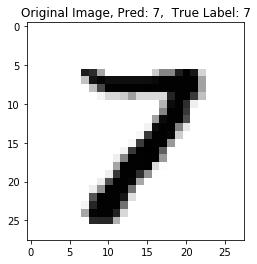

In [39]:
def predict_image_from_test(imageNumber):
    imvalue = X_test[imageNumber]
    trueValue = np.argmax(Y_test[imageNumber],0)
    with tf.Session() as sess:
        sess.run(init)
        # Restore model weights from previously saved model
        load_path = saver.restore(sess, model_path)
        # Predict model 1 image batch size = 1
        vector = sess.run(pred, feed_dict={x: [imvalue]})
        #print(vector[0])
        pred_label = sess.run(tf.argmax(vector[0],0))
        #show image and result
        show_predicted_digit(imvalue, pred_label, trueValue)
        
predict_image_from_test(34)

## Tensor Board

#### clear the graph so you can start from scratch

tf.reset_default_graph()  
sess = tf.Session()

#### create a file writer

file_writer = tf.summary.FileWriter('log_simple_graph/2', sess.graph)

#### save a summary of a continuous scalar value 

tf.summary.scalar("accuracy", accuracy)  
tf.summary.scalar("loss", loss)  

#### save a summary of a continuous value as histogram

tf.summary.histogram('weights_h1',h1weight)  
tf.summary.histogram('bias_h1',h1bias)  

#### merge the summaries to one model

summary_op = tf.summary.merge_all()

#### logging the info when training

file_writer.add_summary(summary, epoch  + batch)  
summary = sess.run([optimizer, loss,summary_op], feed_dict={x: batch_x, y: batch_y})

#### Running the TensorBoard 
!tensorboard --logdir=log_simple_graph  
(!) is for jupyter to access the command line  
(log_simple_graph) is the folder with the graph in it